# **Charger rapidement des images depuis un dossier avec PyTorch** - [lire l'article](https://inside-machinelearning.com/charger-rapidement-des-images-depuis-un-dossier-avec-pytorch/)

Dans cet article, on va voir comment **rapidement charger des images** depuis un dossier avec **la librairie** *PyTorch*.

Il existe de **nombreux types d'images différentes** en informatique et au moins **autant de manières différentes de les charger**.

Ici on va se concentrer sur **les images les plus fréquentes**, les photographies, pour ensuite **explorer les images médicales...** un peu plus complexes que les premières.

Pour cela on va utiliser **deux bibliothèques complémentaires :**
- *PyTorch*
- *imageio*

## **Image 2D - Image RGB**

**Pour ce tutoriel** nous allons utiliser un dataset fourni par les auteurs de [*Deep Learning with PyTorch*](https://www.amazon.fr/gp/product/1617295264/ref=as_li_tl?ie=UTF8&camp=1642&creative=6746&creativeASIN=1617295264&linkCode=as2&tag=insidemachine-21&linkId=03bfe6c85de41fbafeb975d82b6c7486).

Ce dataset est composé de **plusieurs jeux de données** répartis dans différents répertoires.

**Tout d'abord** on va charger le dataset depuis **GitHub** :

In [ ]:
!git clone https://github.com/tkeldenich/PyTorch_Load_Image_FromRepository.git &> /dev/null

### **Deux manière de charger une image**

Une fois que notre dataset est chargé, **deux options s'offre à nous** pour récuperer les images en Python :
- directement au format **tenseur PyTorch**
- via un tableau par exemple **NumPy array**

#### **Par tenseur avec torchvision**

On peut **charger une image** grâce à *torchvision*. Comme son nom l'indique c'est une **sous bibliothèque de PyTorch**.

Ce **package** contient plusieurs choses comme :
- **des jeux de données**
- **les architectures de modèles**
- **des fonctions pour lire et transformer** des images et des vidéos
- et bien d'autre... 

En fait ce package est la partie **Computer Vision de PyTorch !**

Je vous laisse [lire la documentation](https://pytorch.org/vision/stable/index.html) pour **plus d'informations ;)**


Torchvision est **séparé de la librairie PyTorch** vous n'avez donc même pas besoin d'importer *torch* mais seulement *torchvision*.

On utilise **la fonction** *torchvision.io.read_image()* pour **charger notre image dans un tenseur :**

In [ ]:
import torchvision

tsr_img =  torchvision.io.read_image('/content/PyTorch_Load_Image_FromRepository/data/image-dog/bobby.jpg')
tsr_img.shape

torch.Size([3, 720, 1280])

Il est **intéressant** de remarquer que **le format (shape) de l'image** est [3, 720, 1280] alors que dans la plupart **des formats images sur Python** on aurait eu une shape [720, 1280, 3].

3 représentant la dimension **couleur**, 720 la **largeur** et 1280 la **hauteur**.

Si l'on veut **afficher notre image** avec *matplotlib* on devra **transformer le format** de l'image de [3, 720, 1280] en [720, 1280, 3].

Pour cela on utilise **la fonction** *permute()* qui nous permet de **déplacer les dimensions d'un tenseur**.

Une fois que c'est fait on peut **afficher notre image :**

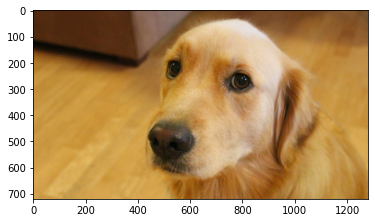

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(tsr_img.permute((1,2,0)))

#### **Par tableaux avec imageio**

On peut aussi **charger des images** grâche à la **librairie** *imageio*.

En fait cette librairie n'a pas de lien avec **PyTorch** mais elle va s'avérer **utile pour certains types d'images**.. c'est ce que nous verrons plus loin dans cet article.

Au lieu de créer un tenseur, *imageio* **créé un array, un tableau**.

La différence entre tenseur et array se trouve dans **la manière de stocker les données en mémoire**.

On utilise la fonction *imread()* **pour lire une image :**

In [ ]:
import imageio

img_arr = imageio.imread('/content/PyTorch_Load_Image_FromRepository/data/image-dog/bobby.jpg')
img_arr.shape

(720, 1280, 3)

Ici, comme expliqué dans la partie précédent **les dimensions de l'image sont [720, 1280, 3].**

On peut donc **directement afficher l'image** avec *matplotlib* sans appliquer de transformation !

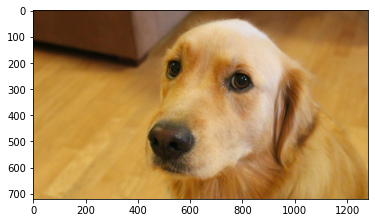

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img_arr)

**Vous avez remarquez ?** Les deux librairies contiennent "**io**".

- *torchvision.io.read_image*
- *imageio*

En fait cela veut dire qu'elles applique des **opérations IO**. Ce sont des opérations qui permettent de **gérer des flux d’entrées et de sorties.**

*io* est le module par défaut pour gérer **ces type de flux sous Python 3**.

I/O signifie **"Input/Output" (entrée/sortie).** 

### **Stocker plusieurs images dans une variable**

#### **Récupérer les images**

Il peut être intéressant de **stocker plusieurs images dans une même variable**, notamment pour faire du [Deep Learning](https://inside-machinelearning.com/le-deep-learning-cest-quoi/).

**Ce type de variable** contenant plusieurs images sous formes de tenseur est appelé **un lot d'image**, **un batch**.

On peut **créer un batch** en utilisant la fonction *stack()*.

Pour cela il faut **lire les images au format tenseurs** puis utiliser la fonction *stack()* sur l'ensemble des tenseurs créés.

Cela ressemblera à :

```
tsr_img1 = torchvision.io.read_image('image1.jpg')
tsr_img2 = torchvision.io.read_image('image2.jpg')
...
tsr_img100 = torchvision.io.read_image('image100.jpg')

batch = torch.stack([tsr_img1, tsr_img2, ..., tsr_img100])
```

Une autre manière **plus pratique** et qui permet de ne pas écrire 50 lignes de code qui se répète est de **stocker toutes les images PNG  directement dans un seul tenseur**.

Pour ce faire on importe **la librairie** *os* qui va nous permettre d'intéragir avec nos fichier.

On indique **le chemin du dossier** où se trouve nos images dans *data_dir*.

Puis on récupère **le nom de toutes les fichiers** se terminant par ".png", les images donc :

In [ ]:
import os

data_dir = '/content/PyTorch_Load_Image_FromRepository/data/image-cats/'

filenames = [name for name in os.listdir(data_dir) if os.path.splitext(name)[-1] == '.png']

**Remarque :** si l'on est sûr que **tous les fichier de notre dossier sont des images** on peut écrire :

```
filenames = [name for name in os.listdir(data_dir)]
```

#### **Stocker les images**

Une fois qu'on a **le nom de chaque images**, il faut créer un tenseur vide.

En fait **ce tenseur vide** va contenir toutes nos images. On l'appelle **batch** qui veut dire lot, c'est **un lot d'images**.

La seule chose a faire est de lui donnée **un format appropriée pour contenir nos images**.

Ici on aura **quatres dimensions :**
- Le **nombre d'images** à ajouter au lot (appelé batch_size, taille du lot)
- Les **couleurs de l'image** (ici on 3 couleurs : rouge, vert, bleu)
- La **largeur** (256)
- La **hauteur** (256)

On utilisera *zeros()* pour créer **un tenseur "vide"** (rempli uniquement de zéro), ce qui nous donne :

In [ ]:
import torch

batch_size = len(filenames)
batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8)

**Remarque :**
- On aura donc **un lot de 3 images** (batch_size = 3) en fait on a prit le nombre d'images total contenues dans le dossier grâce *len(filename)*
- le tenseur contiendra **des entier codés sur 8 bits** (comme dans la plupart des formats photographiques des appareils photo grand public standard), on précise dtype=torch.uint8

Une fois le tenseur vide créé, **il faut le remplir !**

On crée donc **une boucle** *for* qui permet **d'ajouter chacune des images** au tenseur batch.

In [ ]:
for i, filename in enumerate(filenames):
  batch[i] = torchvision.io.read_image(os.path.join(data_dir, filename))

On peut ensuite **afficher les images** en parcourant **notre tenseur batch :**

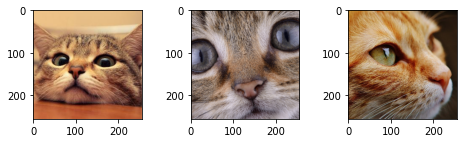

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 2))
for i in range(batch.shape[0]) :
  ax = fig.add_subplot(1, 3, i+1)
  ax.imshow(batch[i].permute(1, 2, 0))

Ou **afficher une seule image :**

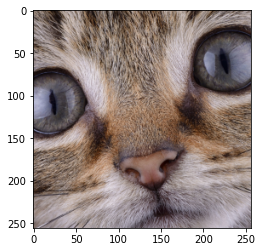

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(batch[1].permute(1, 2, 0))

#### **Normalisation des données**

Si vous êtes sur notre site j'imagine que ce n'est pas pour faire un tennis... **pour faire du Deep Learning** il peut être intéressant de **normaliser nos données**.

En fait **les chercheurs** en Intelligence Artificielle se sont aperçus que **les réseaux de neurones affichent de meilleures performances** d'apprentissage lorsque les données d'entrée sont d'une part au **format float** (chiffres à virgules) mais aussi lorsque les données sont comprises **entre 0 et 1**, ou **entre -1 et 1**.

Par conséquent, on **convertit généralement nos tenseurs** sur l'échelle de **0 à 1** ou **-1 et 1**, c'est ce qu'on appelle **la normalisation**.

Une possibilité est de simplement **diviser** les valeurs de chaque **pixel** de notre image **par 255** (le nombre maximum représentable en 8-bit) :

```
batch = batch.float()
batch /= 255.0
```

Avec cette méthode, nos pixels seront **compris entre 0 et 1**.

L'autre possibilité, **-1 et 1**, consiste à soustraire à chaque pixel **la moyenne** et diviser par **l'écart type** et ce, **sur chaque images**.

Cel permet de **modifier l'échelle** de telle sorte que les pixels modifiés aient **une moyenne de 0** et **un écart type de 1** :


In [ ]:
batch = batch.float()

n_images = batch.shape[1]

for c in range(n_images):
  mean = torch.mean(batch[:, c])
  std = torch.std(batch[:, c])
  batch[:, c] = (batch[:, c] - mean) / std

## **Image 3D - Image volumique**

Nous avons appris à charger et à **représenter des images 2D**, ce sont **images les plus fréquentes**, celles que nous prenons avec un **appareil photo**.

Dans certains contextes cependant, comme en médecine avec les **imageries médicales**, nous avons affaire à des images 3D.

Ce **type d'image** est appelé **image volumique**.

L'image est constituée d'une **séquence de coupes 2D** qui représente l'objet analysé (en général **le corps humain** ou **un organe**).

Chaque coupe est représentée par **une image**, une matrice de pixels (coordonnées X et Y). La coordonnée Z indique le **numéro de la coupe**.

En fait ces images 3D sont **des séquences d'images**. Chacune des séquences correspondant à **une coupe du corps humain**.

On les appelles **images 3D** car elles permettent d'avoir une **vision en 3 dimensions du corps humain**.

Nous allons donc charger un échantillon d'**image volumique de poumon** obtenu par CAT-scan ou tomodensitométrie.

Cette **image volumique** se situe dans le repértoire *"volumetric-dicom/2-LUNG 3.0  B70f-04083"*. Ce répertoire contient **un ensemble d'images au format DICOM** (Digital Imaging and Communications in Medicine). C'est le **format standard** pour la gestion informatique des données issues de l'**imagerie médicale**.

La **combinaison de l'ensemble** de ces images DICOM est **l'image volumique**.

Pour **charger cette image volumique** on utilise  une fonction bien précise, *volread()* de **la librairie** *imageio*.

In [ ]:
import imageio

dir_path = "/content/PyTorch_Load_Image_FromRepository/data/volumetric-dicom/2-LUNG 3.0  B70f-04083"
vol_arr = imageio.volread(dir_path, 'DICOM')

Reading DICOM (examining files): 1/99 files (1.0%)99/99 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 34/99  (34.3%)99/99  (100.0%)


On peut vérifier **les dimensions de notre image volumique** en utilisant *shape()* :

In [ ]:
vol_arr.shape

(99, 512, 512)

On a **99 images** avec en hauteur et en largeur **512x512 pixels**.

Ensuite, on peut facilement transformer cet array en tenseur PyTorch avec *from_numpy()*.

On **transforme** ensuite **les pixels de ce tenseur** en *float()* pour plus de commodité lors de futures éventuelles transformations.

In [ ]:
vol = torch.from_numpy(vol_arr)
vol = vol.float()

Pour que *PyTorch* comprenne que **notre ensemble d'image représente en fait une image 3D** on doit ajouter une dimension.

On aura alors **quatre dimensions :**
- largeur
- hauteur
- nombre d'images DICOM
- nombre d'image volumique

In [ ]:
vol = torch.unsqueeze(vol, 0)
vol.shape

torch.Size([1, 99, 512, 512])

On peut **afficher une des images :**

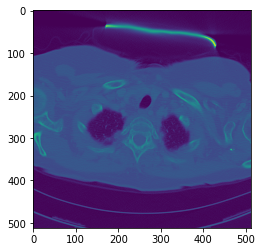

In [ ]:
plt.imshow(vol[0,10])

Ou en **afficher plusieurs :**

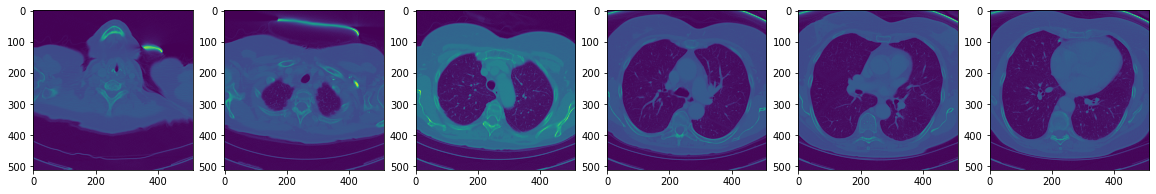

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 4))
for i in range(6) :
  ax = fig.add_subplot(1, 6, i+1)
  ax.imshow(vol[0, i+i*10])